In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

import random
import numpy as np
from typing import Union

### Util Funcitons

In [2]:
VALID_NUMBER_TYPES = [int, float, np.float64]
VALID_SET_TYPES = [tuple, list, np.ndarray]

def generate_node() -> tuple((float, float)):
    """
    Return a tuple of two float value <x, y>
    when x, y <= +-100
    """
    x = random.randint(-10000, 10000)
    y = random.randint(-10000, 10000)
    return (x / 100, y / 100)

def step_function(data: Union[float, np.float64, np.ndarray]) -> int:
    """
    Step function
    """
    if type(data) is np.float64 or type(data) is float:
        return 1 if data > 1 else -1
    elif type(data) is np.ndarray:
        return 1 if data[1] > 1 else -1
    else:
        raise ValueError(
            f"Invalid input {data} type {type(data)}, should be float, np.float64 or np.ndarray")

def create_data(step, n: int = 1000, int_type: bool = True) -> tuple:
    """
    Create two arrays of data, the first one called data contains n tuples of two random float value <x, y>,
    the second called label contains n labels of the data values: 1 if data.y > 1 else -1
    """
    data = []
    label = []
    for _ in range(n):
        node = generate_node()
        data.append(node)
        if int_type:
            label.append(step(node[1]))
        else:
            label.append(step(node))
    return (np.array(data), np.array(label))

def accuracy(predicted: list, test_label: list) -> float:
    """
    Given a predicted label and the test label return the accuracy
    """
    count = 0
    for i, j in zip(predicted, test_label):
        if i == j:
            count += 1
    return count / len(predicted)
    
def MSE(predicted: list, test_label: list) -> float:
    """
    Calculate the MSE (Mean Square error)
    """
    return ((np.array(predicted) - np.array(test_label))**2).mean()

### Adaline Model

In [3]:
LEARNING_RATE = 0.01
RANDOM_STATE = 1
EPOCH = 30

class AdalineModel(object):
    def __init__(self, epoch: int = EPOCH, random_state: int = RANDOM_STATE):
        self.epoch = epoch
        self.random_state = random_state
        self.bias = random.random()
        
    def fit(self, X: list, y: list):
        state = np.random.RandomState(self.random_state)
        self.weights = state.normal(loc=0.0, scale=0.1, size=train_data.shape[1]) # generate new weights
        self.errors = []
        self.accuracies = []
        
        for _ in range(self.epoch):
            predicted = [step_function(x) for x in self.activation(X)]  # get all the predicted values
            errors = y - predicted  # get all the error between real label and predicted
            self.weights[:] = self.weights[:] + LEARNING_RATE * X.T.dot(errors)  # update weights
            self.bias = self.bias + LEARNING_RATE * errors.sum()  # update bias
            self.errors.append(MSE(predicted, y))  # add current error to errors list
            self.accuracies.append(accuracy(predicted, y))  # add the current accuracy to accuracies list

    def net_input(self, X: list) -> list:
        return np.dot(X, self.weights[:]) + self.bias
    
    def activation(self, X: list) -> list:
        return self.net_input(X)

    def predict(self, X: list) -> list:
        return [step_function(x) for x in self.activation(X)]

### Example

In [4]:
train_data, train_label = create_data(step_function)

# create and fit a model
adaline_model = AdalineModel()
adaline_model.fit(np.array(train_data), np.array(train_label))

In [5]:
train_label.mean()

0.004

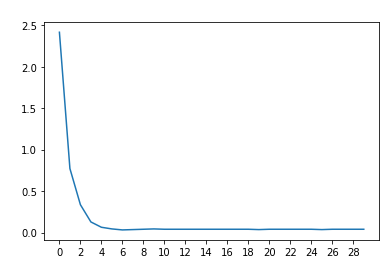

In [6]:
plt.plot(adaline_model.errors, label="errors")
plt.xlabel('Epoch', color='white')
plt.ylabel('Mean Square Error', color='white')
plt.title('Errors', color='white')
plt.xticks(np.arange(EPOCH, step=2))
plt.show()

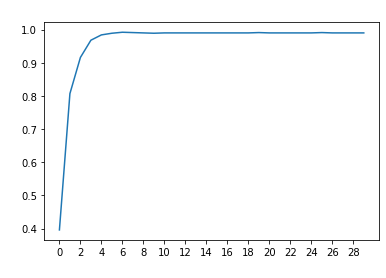

In [7]:
plt.plot(adaline_model.accuracies, label='accuracies')
plt.xlabel('Epoch', color='white')
plt.ylabel('Accuracy', color='white')
plt.title('Accuracy', color='white')
plt.xticks(np.arange(EPOCH, step=2))
plt.show()

In [8]:
# predict for test_data_1
test_data, test_label = create_data(step_function)
predicted = adaline_model.predict(np.array(test_data))
print(f"Accuracy for test_data_1: {accuracy(test_label, predicted)}")

# predict for test_data_1
test_data_2, test_label_2 = create_data(step_function)
predicted_2 = adaline_model.predict(np.array(test_data_2))
print(f"Accuracy for test_data_2: {accuracy(test_label_2, predicted_2)}")

Accuracy for test_data_1: 0.997
Accuracy for test_data_2: 0.999


## Part B:

In [9]:
def step_function(data: Union[tuple, list]) -> int:
    """
    Step function
    """
    if type(data) == tuple or type(data) == list:
        value = data[0]**2 + data[1]**2
        return 1 if 4 <= value and value <= 9 else -1
    else:
        raise ValueError(f"Invalid input {data} type {type(data)}, should be tuple or list")

In [10]:
LEARNING_RATE = 0.01
RANDOM_STATE = 1
EPOCH = 50

def step_function2(data: Union[float, np.float64, np.ndarray]) -> int:
    """
    Step function
    """
    if type(data) is np.float64 or type(data) is float:
        return 1 if data > 1 else -1
    elif type(data) is np.ndarray:
        return 1 if data[1] > 1 else -1
    else:
        raise ValueError(
            f"Invalid input {data} type {type(data)}, should be float, np.float64 or np.ndarray")

class AdalineModel(object):
    def __init__(self, epoch: int = EPOCH, random_state: int = RANDOM_STATE):
        self.epoch = epoch
        self.random_state = random_state
        self.bias = random.random()
        
    def fit(self, X: list, y: list):
        state = np.random.RandomState(self.random_state)
        self.weights = state.normal(loc=0.0, scale=0.1, size=train_data.shape[1]) # generate new weights
        self.errors = []
        self.accuracies = []
        
        for _ in range(self.epoch):
            predicted = np.array([step_function2(x) for x in self.activation(X)])
#             predicted = self.activation(X)  # get all the predicted values
            errors = y - predicted  # get all the error between real label and predicted
            self.weights[:] += LEARNING_RATE * X.T.dot(errors)  # update weights
            self.bias += LEARNING_RATE * errors.sum()  # update bias
            self.errors.append(MSE(predicted, y))  # add current error to errors list
            self.accuracies.append(accuracy(predicted, y))  # add the current accuracy to accuracies list

    def net_input(self, X):
        return np.array([x[0]*self.weights[0] + x[1]*self.weights[1] + self.bias for x in X])
    
    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.net_input(X) >= 1.0, 1, -1)

In [11]:
train_data, train_label = create_data(step_function, n=5000, int_type=False)

# create and fit a model
adaline_model = AdalineModel()
adaline_model.fit(np.array(train_data), np.array(train_label))

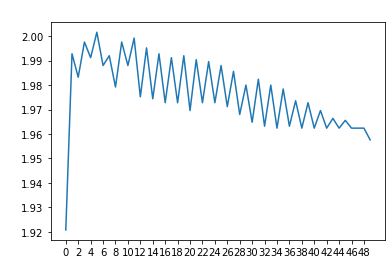

In [12]:
plt.plot(adaline_model.errors, label="errors")
plt.xlabel('Epoch', color='white')
plt.ylabel('Mean Square Error', color='white')
plt.title('Errors', color='white')
plt.xticks(np.arange(EPOCH, step=2))
plt.show()

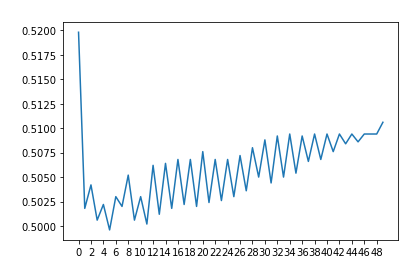

In [13]:
plt.plot(adaline_model.accuracies, label='accuracies')
plt.xlabel('Epoch', color='white')
plt.ylabel('Accuracy', color='white')
plt.title('Accuracy', color='white')
plt.xticks(np.arange(EPOCH, step=2))
plt.show()

In [151]:
# predict for test_data_1

test_data_1, test_label_1 = create_data(step_function, int_type=False)
predicted = adaline_model.predict(np.array(test_data_1))
print(f"Accuracy for test_data_1: {accuracy(test_label_1, predicted)}")

Accuracy for test_data_1: 0.875
